**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

Text(0.5, 1.0, 'Tamanho da imagem : (212, 161)')

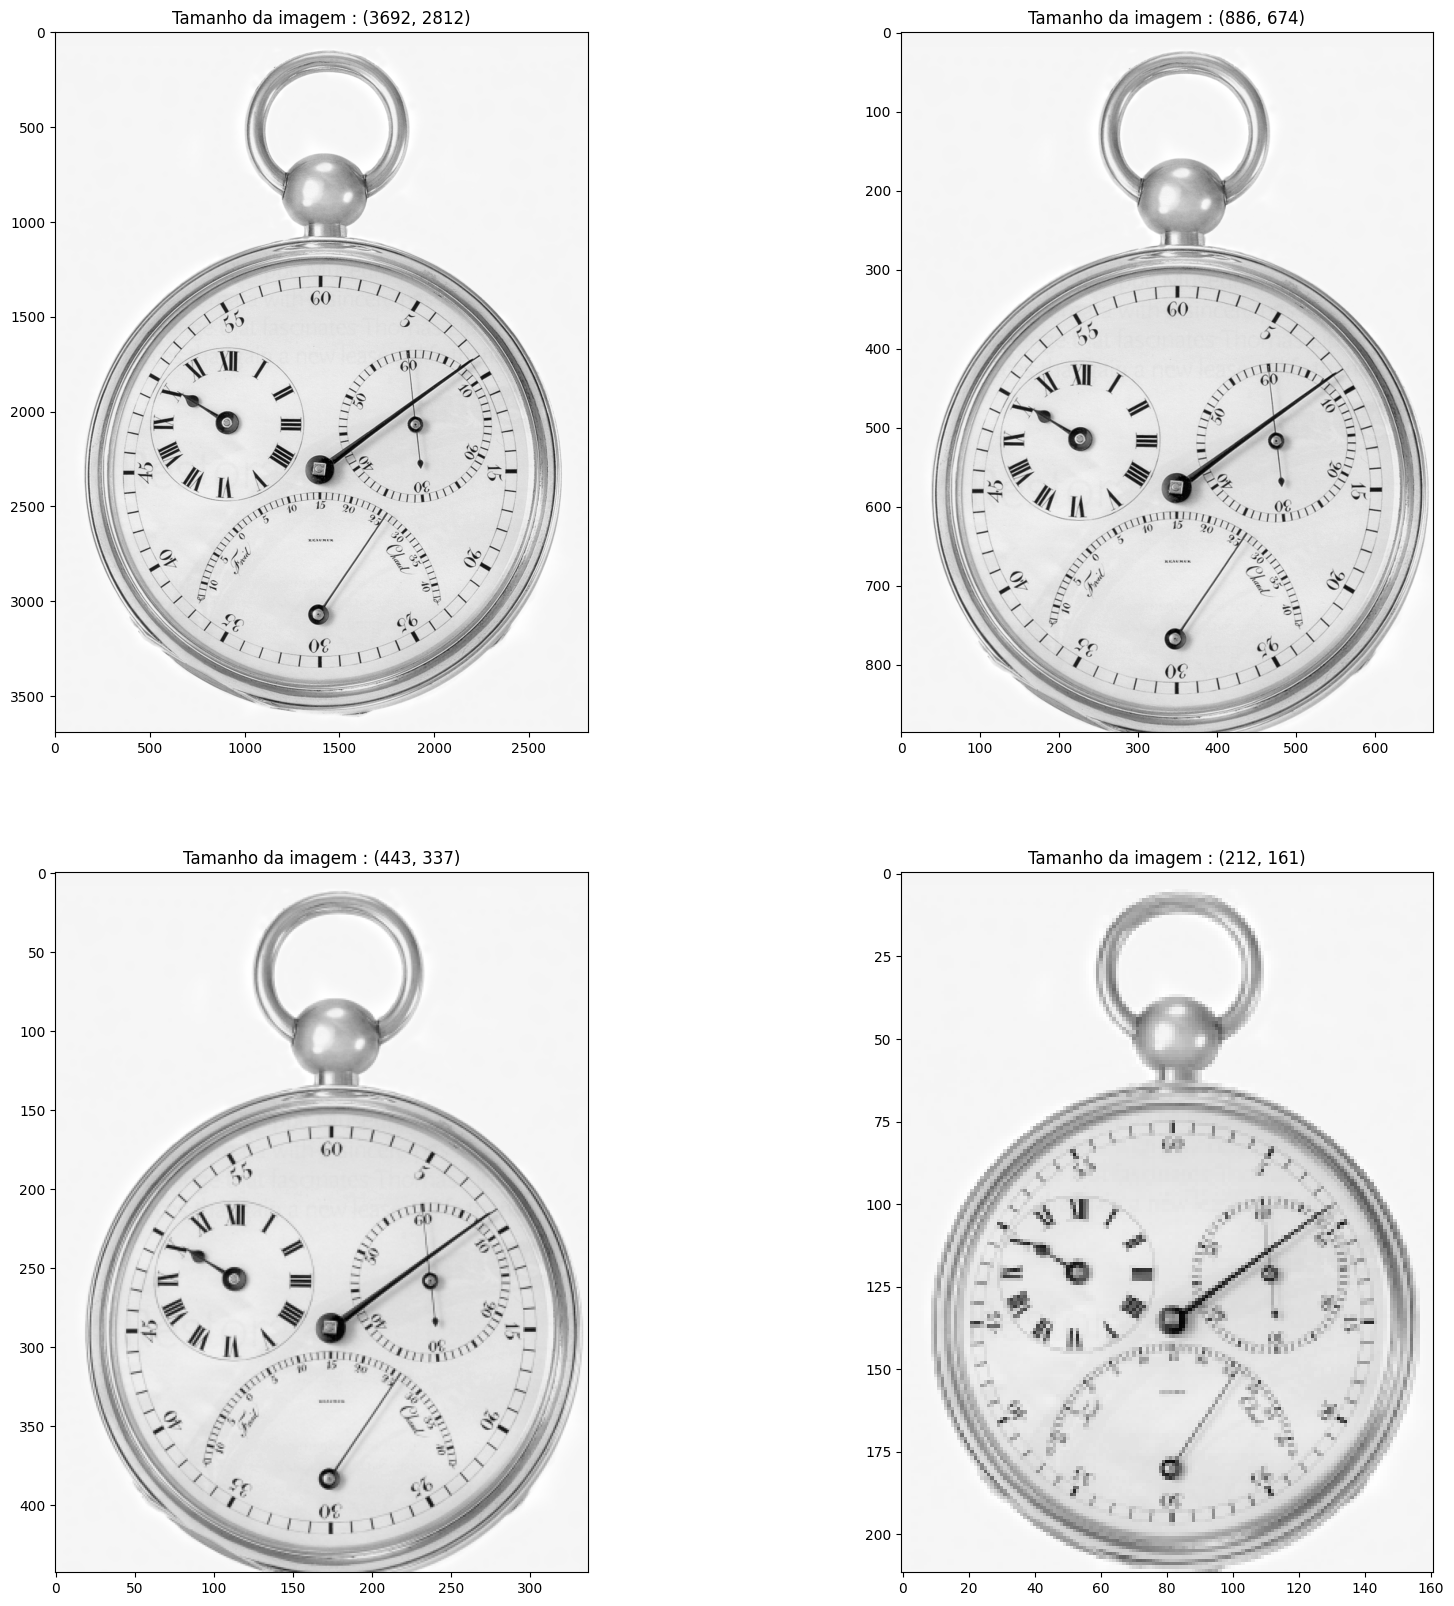

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

dpi1250 = 1250
dpi300 = 300
dpi150 = 150
dpi72 = 72

img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)


def mediaMatriz(matriz, linhaInicial, linhaFinal, colunaInicial, colunaFinal):

    total = 0
    cont = 0
    for i in range(linhaInicial,linhaFinal):
        for j in range(colunaInicial,colunaFinal):
            total = total + matriz[i][j]
            cont = cont + 1

    return total/cont

def reduzirMatriz(matriz, dpiInicial, dpiFinal):
    linhasInicial = matriz.shape[0]
    colunasInicial = matriz.shape[1]

    razao = dpiInicial/dpiFinal
    linhasFinal = int(linhasInicial/razao)
    colunasFinal = int(colunasInicial/razao)
    erro = 0
    passo = int(razao)

    matrizFinal = np.zeros((linhasFinal,colunasFinal))

    for i in range(linhasFinal):

        for j in range(colunasFinal):

            if (j*passo+passo<colunasInicial and i*passo+passo<linhasInicial):
                matrizFinal[i][j] = mediaMatriz(matriz, i*passo, i*passo+passo, j*passo, j*passo+passo)
                erro = razao - passo
                passo = int(razao+erro)


    return matrizFinal


# Alterar o terceiro argumento da função para alterar o dpi final (aceita números)

imgFinal1 = reduzirMatriz(img, dpi1250, dpi300)
imgFinal2 = reduzirMatriz(img, dpi1250, dpi150)
imgFinal3 = reduzirMatriz(img, dpi1250, dpi72)

figura = plt.figure(figsize = (20,20))

figura.add_subplot(2,2,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title(f'Tamanho da imagem : {img.shape}')

figura.add_subplot(2,2,2)
plt.imshow(imgFinal1, cmap='gray', vmin=0, vmax=255)
plt.title(f'Tamanho da imagem : {imgFinal1.shape}')

figura.add_subplot(2,2,3)
plt.imshow(imgFinal2, cmap='gray', vmin=0, vmax=255)
plt.title(f'Tamanho da imagem : {imgFinal2.shape}')

figura.add_subplot(2,2,4)
plt.imshow(imgFinal3, cmap='gray', vmin=0, vmax=255)
plt.title(f'Tamanho da imagem : {imgFinal3.shape}')




2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

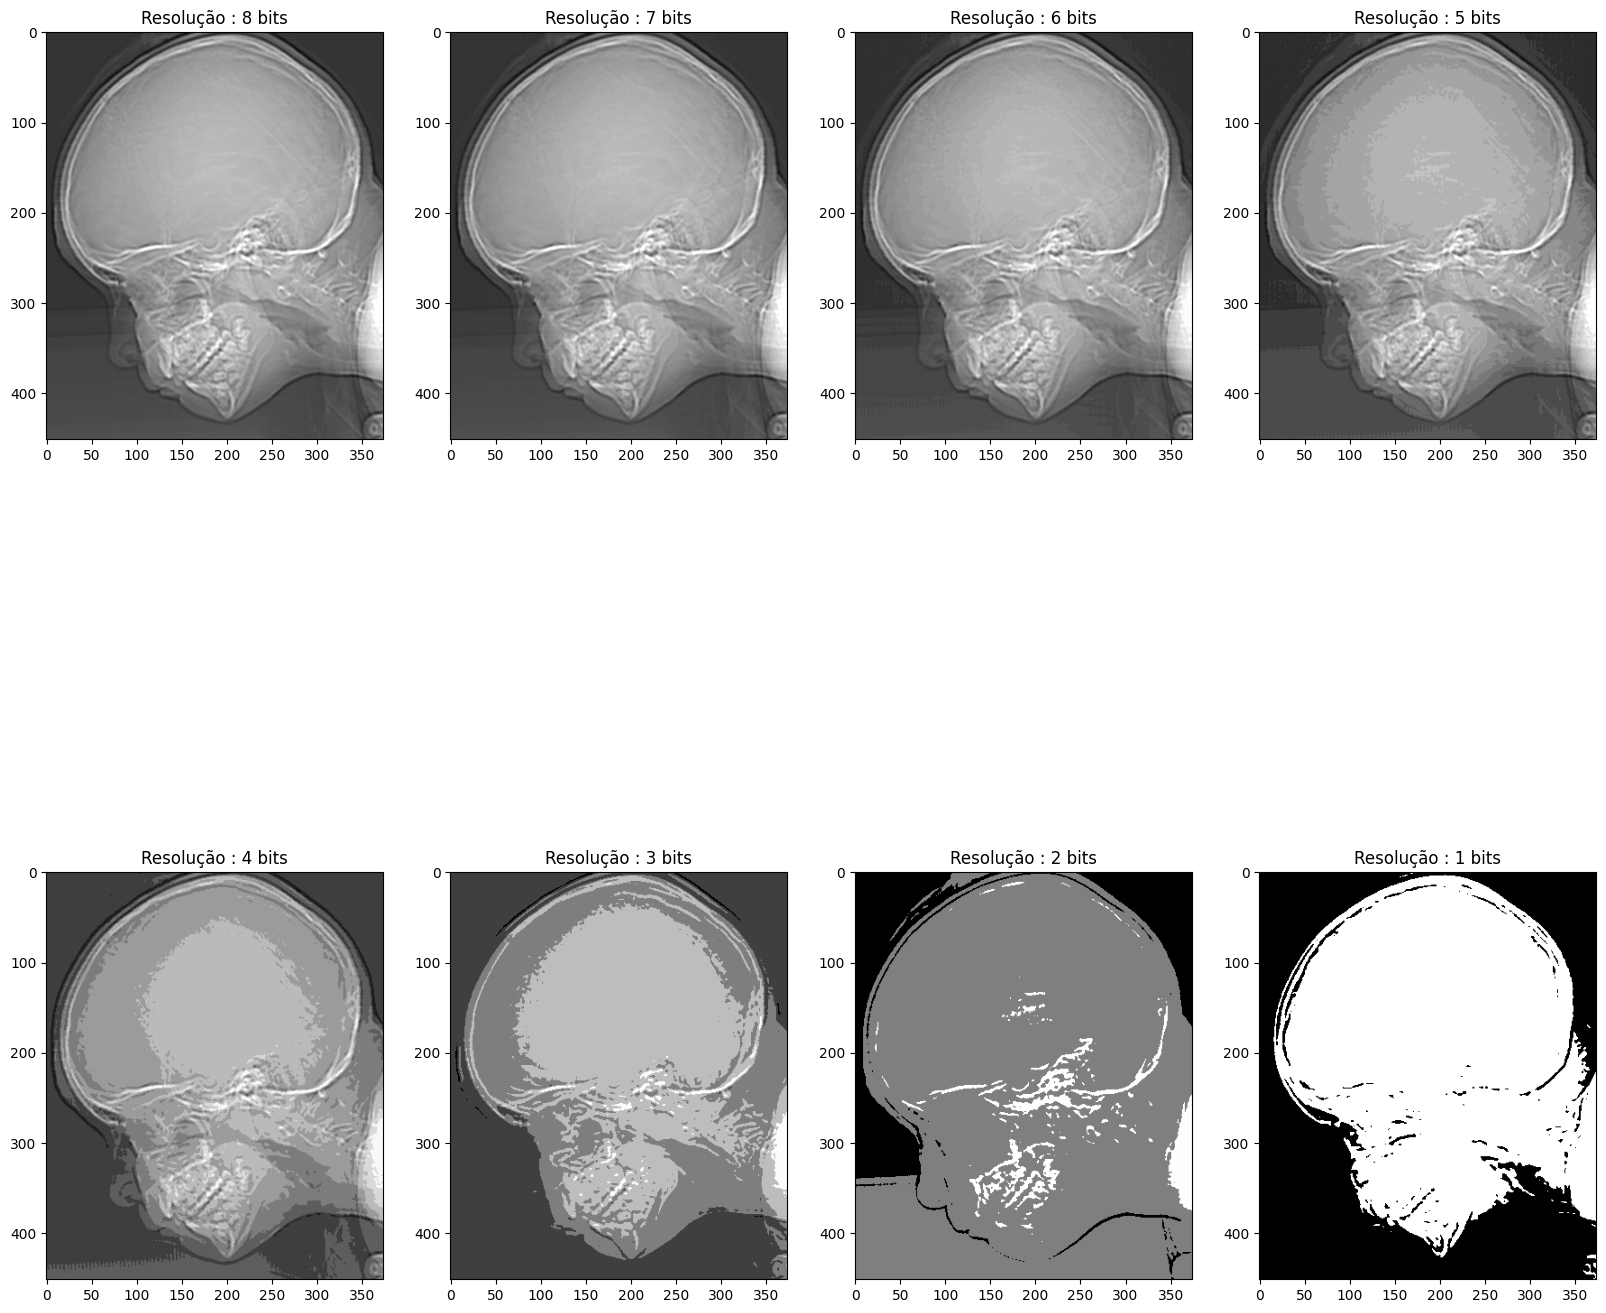

In [52]:
import cv2
import matplotlib.pyplot as plt
from math import ceil

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)

def reduzAmplitude(imagem, bits):

    intervalos = int(511/(2**bits))
    linhas, colunas = imagem.shape
    novaimagem = np.zeros(imagem.shape)

    for i in range(linhas):
        for j in range(colunas):

            if imagem[i][j]%(intervalos) >= (intervalos)/2:
                novaimagem[i][j] = ceil(imagem[i][j]/intervalos)*intervalos
            else:
                novaimagem[i][j] = int(imagem[i][j]/intervalos)*intervalos

    return novaimagem




figura = plt.figure(figsize = (20,20))
for i in range(8,0,-1):
    figura.add_subplot(2,4,9-i)
    imagem = reduzAmplitude(img,i)
    plt.imshow(imagem, cmap='gray', vmin=0, vmax=255)
    plt.title(f'Resolução : {i} bits')

